In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [96]:
df = pd.read_csv("C:/Users/punit/OneDrive/Desktop/ACM-30Days/20newsgroups.csv")
df.head()

,newsgroup,document_id
0,talk.religion.misc,82757
1,talk.religion.misc,82758
2,talk.religion.misc,82759
3,talk.religion.misc,82760
4,talk.religion.misc,82763


In [102]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(texts)
print("TF-IDF shape:", X_tfidf.shape)

TF-IDF shape: (18846, 134101)


In [104]:
#Dimensionality Reduction using SVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_tfidf)
print("SVD-reduced shape:", X_svd.shape)

SVD-reduced shape: (18846, 2)


In [35]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_tfidf = vectorizer.fit_transform(df['newsgroup'])

print("TF-IDF Matrix Shape:", X_tfidf.shape)

TF-IDF Matrix Shape: (628, 3)


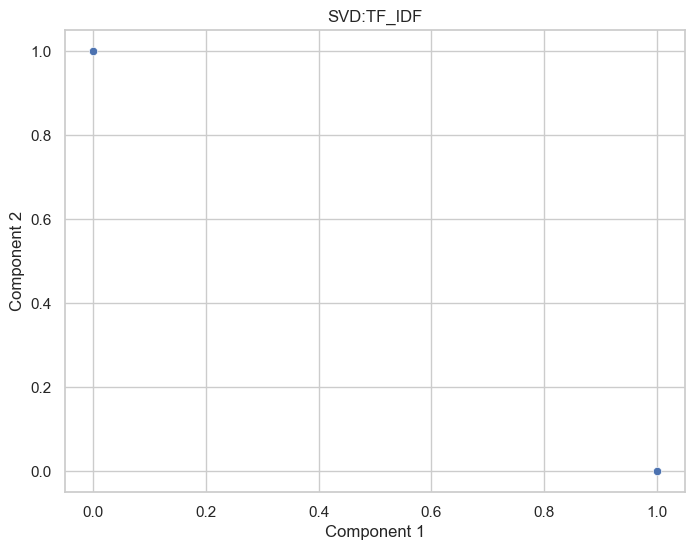

In [110]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_SVD[:,0],y=X_SVD[:,1])
plt.title("SVD:TF_IDF")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


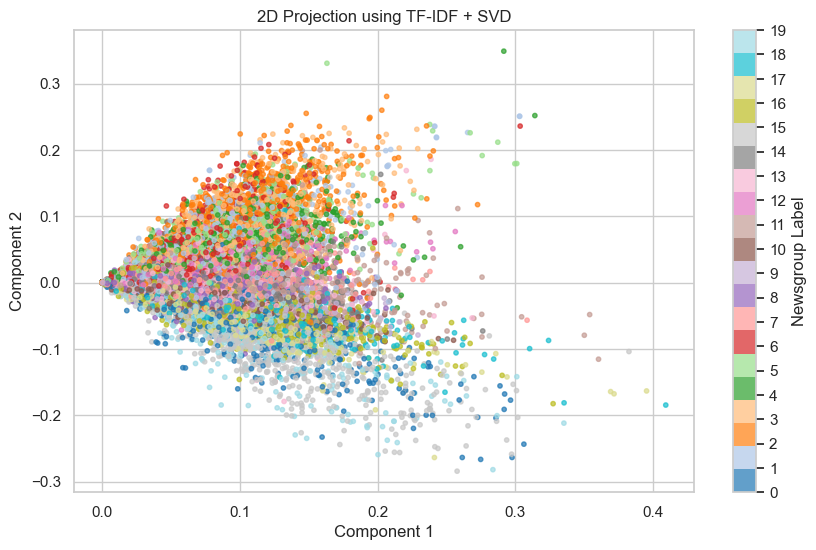

In [113]:
# Plot the 2D projection
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels, cmap='tab20', s=10, alpha=0.7)
plt.colorbar(scatter, ticks=range(20), label="Newsgroup Label")
plt.title("2D Projection using TF-IDF + SVD")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


In [83]:
# Apply clustering (optional)
kmeans = KMeans(n_clusters=20, random_state=42)
predicted_clusters = kmeans.fit_predict(X_svd)

# Evaluate clustering quality
sil_score = silhouette_score(X_svd, predicted_clusters)
print("Silhouette Score (k=20):", sil_score)


Silhouette Score (k=20): 0.3323879484668315


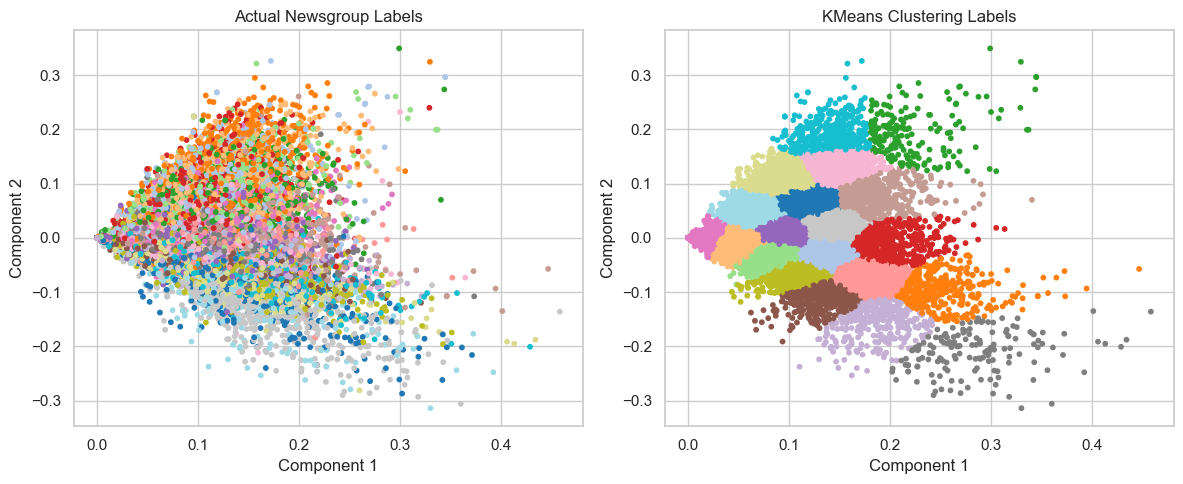

In [84]:
# Compare true vs predicted labels visually
plt.figure(figsize=(12, 5))

# True labels
plt.subplot(1, 2, 1)
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels, cmap='tab20', s=10)
plt.title("Actual Newsgroup Labels")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# Clustered labels
plt.subplot(1, 2, 2)
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=predicted_clusters, cmap='tab20', s=10)
plt.title("KMeans Clustering Labels")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.tight_layout()
plt.show()

- TF-IDF generates high-dimensional sparse vectors from text data.
- Truncated SVD (similar to PCA) helps reduce the dimensionality while preserving structure.
- This 2D representation helps us visualize topic clusters.
- KMeans clustering helps explore how text naturally groups, even without using labels.